## 程式設計目標：
* 設定一個gradient descent，讓點朝向一個二維方程式的低點移動

#### 在這裡使用了一個有意思的package，是我之前在用matplotlib時偶然想到的。<br><br>既然可以plot 2d 圖型，為甚麼不能plot 3d 圖形呢?<br><br>於是我查了一下，找到了它---mpl_toolkits.mplot3d

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd

#### 在這裡我隨意設定了一個有local minimum 的二元四次方程式(挑戰自己XDD)，讓程式去跑 GD

In [282]:
# 設定基本 grid 和方程式 (loss)、兩個維度分別的偏微分 (dloss_x, d_loss_y)
# 算這個的時候善用 wolfram，不要傻傻自己算 XDDDD

x, y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
X = x.ravel()
Y = y.ravel()
def loss(x, y):
    return ((x+8.1)*(x-2.1)*(x-5.2)*(x-7.4)+(y+9.3)*(y+5.3)*(y+4.5)*(y-9.1))/100
def dloss_x(x):
    return 0.04*(x**3-4.95*x**2-27.065*x+111.302)
def dloss_y(y):
    return 0.04*(y**3+7.5*y**2-29.41*y-206.151)


### 好，我們來看一下平面的 plotting長甚麼樣子，大家就會知道為甚麼我想用三維 plotting了 :))

Text(0,0.5,'Y')

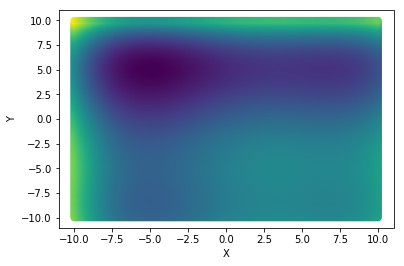

In [283]:
# 二維的 plotting
plt.scatter(X, Y, c=loss(X, Y))
plt.xlabel("X")
plt.ylabel("Y")

### 請問一下這張圖到底有啥好看的...？

### 與其靠想像力跟超能力，還不如靠 mplot3d直接做三維好棒棒

In [318]:
# plot_map 是畫出原本方程式的 plotting，
# 然後我把後來要畫出 GD路徑的函式也 encode在裡面了

def plot_map(draw = False, view = [60, 50], axis = None):
    ax = plt.axes(projection = "3d")
    ax.scatter3D(X, Y, loss(X,Y), c = loss(X, Y), cmap="coolwarm", s=1)
    
    # 這行可以改圖形的左右視角(azim)跟仰角(elev)
    ax.view_init(azim=view[0], elev=view[1]) 
    
    # 設定三軸標記
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_zlabel(zlabel="z")
    
    # 畫 GD 的函式
    if (draw):
        draw_map(axis[:, 0], axis[:, 1], axis[:, 2], ax)
        
def draw_map(_x, _y, _z, ax):
    ax.plot(_x, _y, _z, markerfacecolor='g', markeredgecolor='g', marker = '*', markersize=5, alpha = 0.2)

### 讓我們先來 appreciate 一下三維 plotting有多美

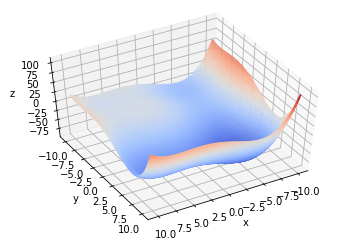

In [301]:
plot_map()

### 有沒有 有沒有！！！美感差了好幾倍阿阿阿阿阿阿阿阿！！！！！！

#### 好啦我們來做正事XD  GD的概念很簡單<br><br>就是把 原本座標 - (learning_rate x 斜率)，多次的更新之後就會到minimum，向滾球一樣<br><br>當然因為有local minimum的關係，不一定會掉到global minimum

In [302]:
def GD(max_steps, step_size, start_x, start_y):
    # 存取每個時刻的座標，z值就是 loss(x, y)
    x = start_x
    y = start_y
    loss_value = loss(start_x, start_y)
    
    # path 用來存整個 GD經過的路徑
    path = list()
    path.append([x, y, loss(x, y)])
    
    # 用 for迴圈進行 GD的核心步驟
    for _ in range(max_steps):
        # x, y分別移動，再把x, y, z存進 path
        x-=dloss_x(x)*step_size
        y-=dloss_y(y)*step_size
        loss_value = loss(x, y)
        path.append([x, y, loss_value])
    return path

### 好，函式設定好了，我們來跑跑看

In [303]:
dots = GD(30, 0.1, 0,0)

### 記得，因為 dots存出來的式 list，把它轉成 numpy array，分別存取 x, y, z值時會比較方便

In [304]:
dots = np.array(dots)

### 看起來沒有問題，來看一下圖型跟路徑

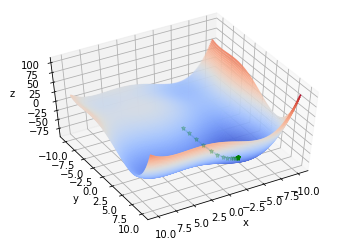

In [319]:
plot_map(draw=True, axis=dots)

### 好像有點被擋到了，換個角度試試

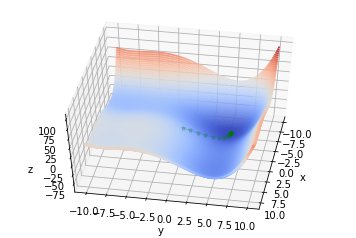

In [320]:
plot_map(draw=True, view=[10, 50], axis=dots)

### 很明顯它跑到minimum了！！！<br><br>我們換個起點再一次，這次讓他跑到local minimum

In [307]:
loc_dots = GD(max_steps=30, start_x=7.5, start_y=0.0, step_size=0.1)

In [308]:
loc_dots = np.array(loc_dots)

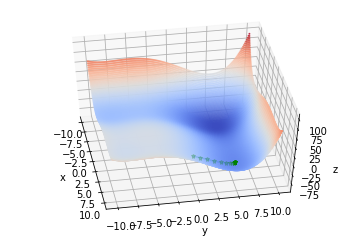

In [321]:
plot_map(axis=loc_dots, draw=True, view=[-10, 50])

### 滑到一個 local minimum了~~~

## 好啦，今天的作業就到這邊，謝謝收看~